# DAY1 복습 : 생선 품종 분류 모델 / 다른 모듈도 사용 
- 데이터 : 2가지 품종의 생성 데이터 fish.csv
- 피처 : Weight
- 타겟 : Species
- 방법 : 지도학습 / 분류
- 최적의 K개 찾기

## (1) 모듈 로딩 & 데이터 준비

In [1]:
import pandas as pd # 데이터 파일 처리 관련 모듈 
from sklearn.neighbors import KNeighborsClassifier # 기계학습 관련 모듈 
import matplotlib.pyplot as plt # 그래프

In [2]:
data_file = "../data/fish.csv"
fishDF = pd.read_csv(data_file, usecols = [0, 1, 2]) # 5개의 피쳐/특성 중 2개의 피쳐/특성 선택 
# fishDF = pd.read_csv(data_file, usecols = ["Species", "Weight", "Length"]) # 윗줄과 같은 표현
fishDF.info() # 기본 정보 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length   159 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.9+ KB


In [3]:
# Bream, Smelt 품종 행만 추출
mask = fishDF.Species.isin(["Bream", "Smelt"]) # boolean indexing

mask

0      True
1      True
2      True
3      True
4      True
       ... 
154    True
155    True
156    True
157    True
158    True
Name: Species, Length: 159, dtype: bool

In [4]:
# 해당 행만 도출
twoFishDF = fishDF[mask]

# 인덱스에 정리가 필요해 보임 
twoFishDF.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,
        28,  29,  30,  31,  32,  33,  34, 145, 146, 147, 148, 149, 150, 151,
       152, 153, 154, 155, 156, 157, 158],
      dtype='int64')

In [5]:
# 인덱스 정리 
twoFishDF.reset_index(drop=True, inplace = True)
twoFishDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
5,Bream,450.0,29.7
6,Bream,500.0,29.7
7,Bream,390.0,30.0
8,Bream,450.0,30.0
9,Bream,500.0,30.7


In [6]:
# Species 이진화 
# twoFishDF["Species"] = twoFishDF["Species"].replace({"Bream":0, "Smelt":1}).copy()
# twoFishDF

## 2. 데이터 전처리
- 정제 : 결측치, 중복 데이터, 이상치 처리
- 정규화 : feature scaling

### 2-1) 모듈로 계산하는 방법 -> 3에서 한방에

### 2-1) 직접하는 법

In [7]:
# 표준정규분포 -> 평균 = 0, 표준편차 = 1 -> z-score = 피처-평균/표준편차
twoFishDF.describe()

,Weight,Length
count,49.000000,49.000000
mean,444.500000,27.055102
std,328.143233,10.242804
min,6.700000,9.800000
25%,19.700000,14.300000
50%,500.000000,31.000000
75%,700.000000,34.500000
max,1000.000000,41.000000


In [8]:
ret1 = twoFishDF.Weight - twoFishDF.Weight.mean()
ret1 = ret1/twoFishDF.Weight.std()
# twoFishDF.loc[:, "Weight"] = ret1

In [9]:
ret2 = twoFishDF.Length - twoFishDF.Length.mean()
ret2 = ret2/twoFishDF.Length.std()
# twoFishDF.loc[:, "Length"] = ret2

## 3. 기계학습을 위한 데이터 준비
- 피처/특성 + 타겟/라벨/클래스
- 학습용 데이터 셋 : 80%
- 테스트용 데이터 셋 : 20%

### 3-1. 학습 / 테스트 데이터 셋 분리 (데이터의 크기가 작아서 검증은 제외)
- 지도학습 중 분류 => [고려] 타겟의 비율
- 학습 : 테스트 = 80 : 20

In [10]:
# 피쳐/특성/속성 데이터 추출
featureDF=twoFishDF[twoFishDF.columns[1:]]
featureDF.head(2)

,Weight,Length
0,242.0,25.4
1,290.0,26.3


In [11]:
# 클래스/타겟/라벨 데이터 추출
# 합쳐서 작업해도 되고, 밑에 처럼 나눠서 작업해도 됨 
targetDF = twoFishDF["Species"]
targetDF.head(2) # 정수 인코딩 필요

0    Bream
1    Bream
Name: Species, dtype: object

In [12]:
targetDF = targetDF.replace({"Bream":0, "Smelt":1})

In [13]:
# -------------------------------------------모듈 로딩
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetDF, test_size=0.2, stratify = targetDF) # target의 비율에 맞게 분리해달라

In [15]:
# 학습 및 테스트 데이터 셋 확인 
print(f"학습용 데이터셋 ---> \n{X_train.shape}, {Y_train.shape}")
print()
print(f"테스트용 데이터셋 비율 ---> \n{Y_train.value_counts()/Y_train.shape[0]}")
print()
print(f"테스트용 데이터셋 ---> \n{X_test.shape}, {Y_test.shape}")
print()
print(f"테스트용 데이터셋 비율 ---> \n{Y_test.value_counts()/Y_test.shape[0]}")

학습용 데이터셋 ---> 
(39, 2), (39,)

테스트용 데이터셋 비율 ---> 
Species
0    0.717949
1    0.282051
Name: count, dtype: float64

테스트용 데이터셋 ---> 
(10, 2), (10,)

테스트용 데이터셋 비율 ---> 
Species
0    0.7
1    0.3
Name: count, dtype: float64


### 3-2. feature 데이터의 스케일링
- feature들의 값의 범위가 다른 것을 통일 시켜줌
- scikit-learn의 preprocessing 모듈 활용

In [16]:
# 모듈로딩
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # 정규 분포, minmax, robust

> 표준정규분포 스케일링 : 평균 -> 0 편차 -> 1
> 1. 스케일러 인스턴스 생성
> 2. 데이터에 대한 평균, 표준편차 계산 진행 : __fit()__ method
> 3. 데이터에 대한 스케일링 진행 : __transform()__ method

In [17]:
scaler = StandardScaler()

In [18]:
scaler.fit(X_train) 

StandardScaler()

In [19]:
# _ 가 붙는 속성은 fit 이후에만 볼 수 있음 
scaler.mean_

array([436.95641026,  27.14871795])

In [20]:
scaled_X_train = scaler.transform(X_train)
scaled_X_train.shape
# fit_transform도 있지만 우리는 학습용 데이터의 값을 테스트에 적용시켜야해서 한번에 하면 안됨 

(39, 2)

In [21]:
# 테스트용 데이터 feature scaling
scaled_X_test = scaler.transform(X_test) # 위에서 scaler.fit(X_train)!! 학습 데이터의 값(mean, std)으로 테스트 데이터 전처리 !!!!!!!!!!!!
scaled_X_test.shape

(10, 2)

### 3-3. 확인용 시각화

In [22]:
# 모듈 로딩
import matplotlib.pyplot as plt

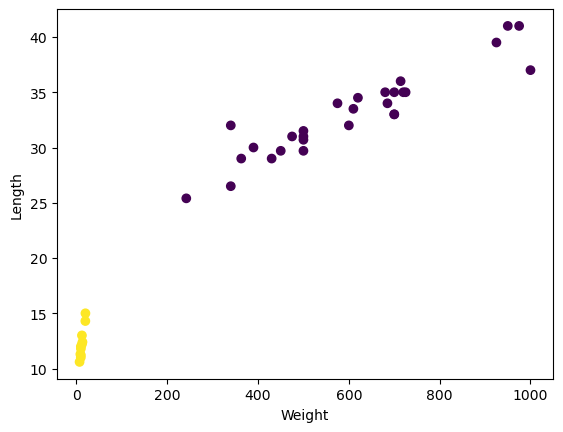

In [23]:
# 원본 데이터(스케일링 전) 데이터 시각화 
plt.scatter(X_train.Weight, X_train.Length, c = Y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()

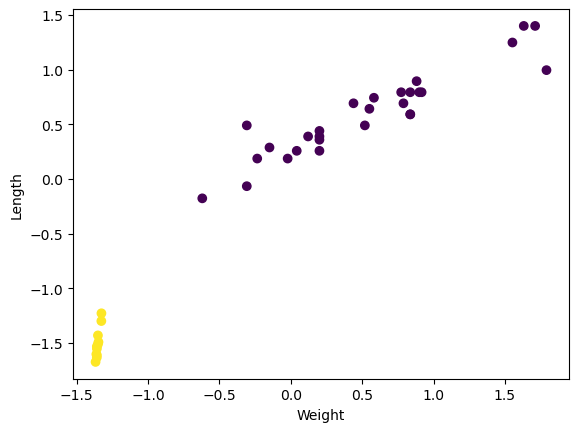

In [24]:
# 스케일된 데이터 시각화 -> dtype = ndarray
plt.scatter(scaled_X_train[:, 0], scaled_X_train[:, 1], c = Y_train)
plt.xlabel("Weight")
plt.ylabel("Length")
plt.show()

## 4. 학습

In [29]:
Y_train.shape

(39,)

In [25]:
# 모델 성능 좌우하는 매개변수 : 하이퍼파라미터
# KNN의 하이퍼파라미터 : n_neighbors -> 1 ~ 전체 데이터 수
max_k = scaled_X_train.shape[0]
test_scoreList = []
train_scoreList = []
for k in range(1, max_k+1):
    
    model =  KNeighborsClassifier(n_neighbors=k)
    model.fit(scaled_X_train, Y_train)
    
    test_scoreList.append(model.score(scaled_X_train, Y_train))
    train_scoreList.append(model.score(scaled_X_test, Y_test))


In [26]:
# 학습 및 테스트 데이터에 대한 점수 확인
print(f"Train Score : {test_scoreList}")
print(f"Test Score : {train_scoreList}")

Train Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718, 0.717948717948718]
Test Score : [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]


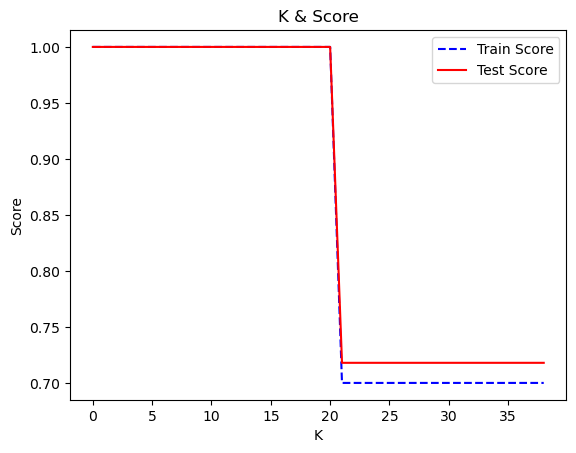

In [27]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.show()

In [ ]:
fishModel.fit(scaled_X_train, Y_train)

## 5. test 진행

In [ ]:
fishModel.score(scaled_X_test, Y_test)

## 6. 예측

In [ ]:
# 길이 25,  무게 160 생선의 무게
new_data = pd.DataFrame([[160, 25]], columns = twoFishDF.columns[1:])
new_data

In [ ]:
# 피쳐스케일링 진행 -> 위에서 썼던 scaler 사용
scaled_new_data = scaler.transform(new_data)
scaled_new_data

In [ ]:
# 예측
fishModel.predict(scaled_new_data)

feature의 수에 따라 차원이 달라짐 -> 많다고 좋은 거 아니고 보통 가장 관련있는 2개에서 3개 정도만 씀  
-> 품종이랑 가장 관련이 높은 것을 찾는 것이다!

In [ ]:
## 방법1 : KNN
## 방법2 : SVC 
from sklearn.svm import SVC

fishModel2 = SVC()

fishModel2.fit(scaled_X_train, Y_train)

In [ ]:
fishModel2.score(scaled_X_test, Y_test)